In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


In [3]:
KMeans

sklearn.cluster._kmeans.KMeans

In [4]:
# Load the dataset
df = pd.read_csv('sales_data_sample.csv', encoding='Windows-1252')

# Display the first few rows of the dataset
print(df.head())

# Check for any missing values
print(df.isnull().sum())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [5]:
# Select relevant numerical columns for clustering
features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']
df_clustering = df[features]

# Check the cleaned dataset
print(df_clustering.head())


   QUANTITYORDERED  PRICEEACH    SALES  MSRP
0               30      95.70  2871.00    95
1               34      81.35  2765.90    95
2               41      94.74  3884.34    95
3               45      83.26  3746.70    95
4               49     100.00  5205.27    95


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering)


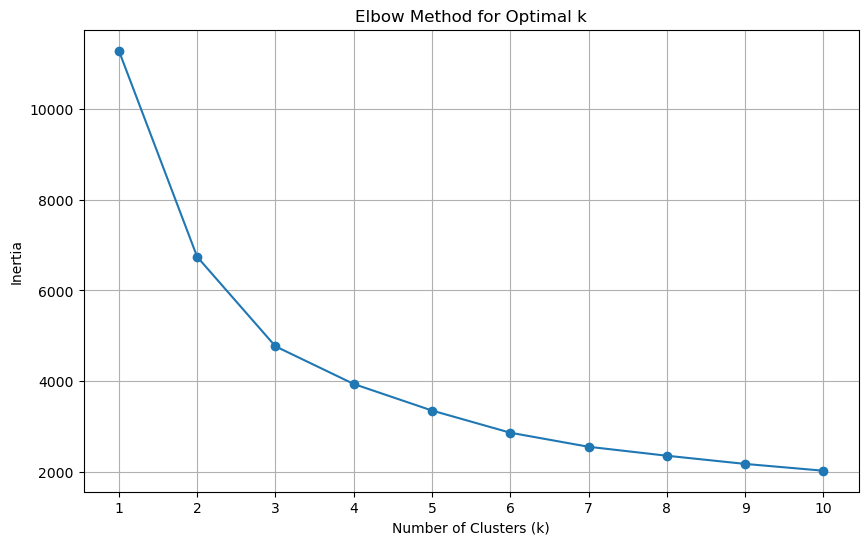

In [7]:
# Elbow Method
inertia = []
k_range = range(1, 11)  # Test from 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()


In [8]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, n_init=10,random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the cluster centers
print("Cluster Centers:\n", scaler.inverse_transform(kmeans.cluster_centers_))


Cluster Centers:
 [[  43.7201426    73.22827094 3199.87871658   75.98217469]
 [  27.35376344   96.52260215 3157.94496774  114.73225806]
 [  43.22836879   99.56446809 6069.53652482  135.97446809]
 [  29.70494418   56.02558214 1629.32188198   62.40988836]]


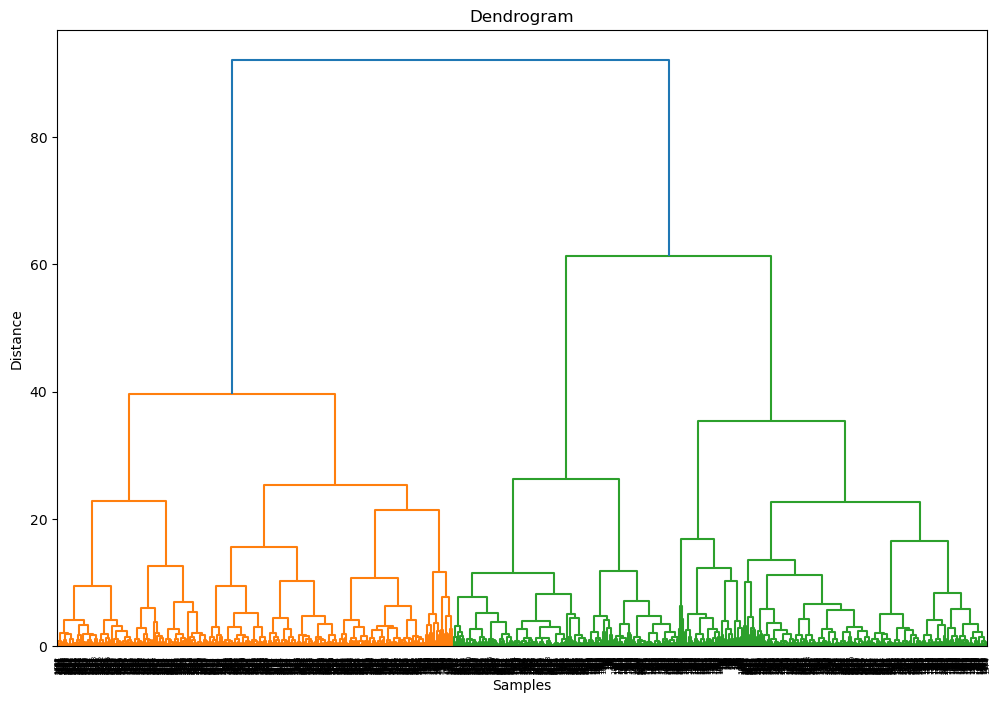

In [11]:
# Hierarchical Clustering
linked = linkage(X_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [13]:

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [15]:
num_clusters = 3
clusters = fcluster(linked, num_clusters, criterion='maxclust')

# Adding cluster information to the original dataset
df_clustering['Cluster'] = clusters

# Displaying the first few rows of the dataset with cluster information
print(df_clustering.head())

   QUANTITYORDERED  PRICEEACH    SALES  MSRP  Cluster
0               30      95.70  2871.00    95        2
1               34      81.35  2765.90    95        2
2               41      94.74  3884.34    95        1
3               45      83.26  3746.70    95        1
4               49     100.00  5205.27    95        3


C:\Users\RoG STRIX\AppData\Local\Temp\ipykernel_20920\4282546636.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['Cluster'] = clusters


In [ ]:
fcluster